# Python for Labs/Lectures

## Lecture 3: Plotting with Matplotlib
Nicholas Lee-Hone

July 2019

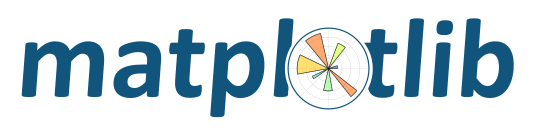

In [ ]:
import numpy as np

Matplotlib is the standard plotting package for Python. It allows users to create high-quality plots that can be exported to a variety of formats.

There are many other plotting packages, such as Mayavi, Plotly, PyQtGraph, and Bokeh, which serve different purposes such as 3d graphics, interactive plots, web export, and many more. Please take the time to look through these packages if you want to do anything more complicated than creating a static plot.

Matplotlib has two different interfaces, the object oriented interface, and the pyplot interface.

Pyplot is deliberately built to resemble the way Matlab works.

The object oriented interface allows for finer-grained control over the plot, but is harder to work with.

We will focus on pyplot in this lecture, but will have to use the object oriented interface from time to time.

The following figure shows the different parts of a plot as recognized by Matplotlib. This figure was built with Matplotlib, and showcases many of the capabilities of the package.

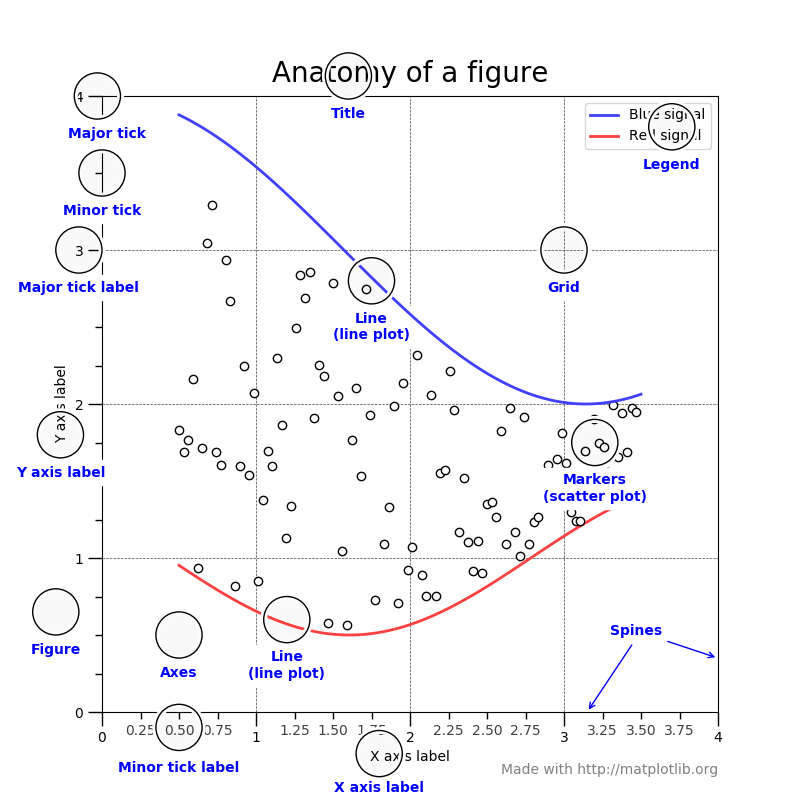
https://matplotlib.org/gallery/showcase/anatomy.html

## Pyplot basics

https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

In [2]:
# Import the pyplot module and alias it
import matplotlib.pyplot as plt

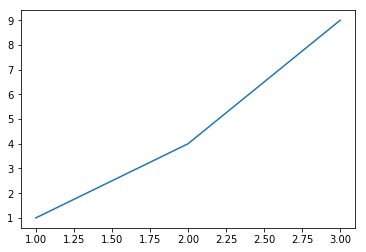

In [3]:
# The plot command takes parameters in this order:
# x1, y1
# These can be lists, tuples, or numpy arrays. The length of x1 and y1 must be the same
plt.plot([1, 2, 3], [1, 4, 9])

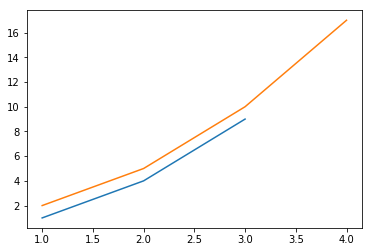

In [4]:
# Plot multiple lines in the same command
# x1, y2, x2, y2, ...
plt.plot([1, 2, 3], [1, 4, 9], [1, 2, 3, 4], [2, 5, 10, 17])

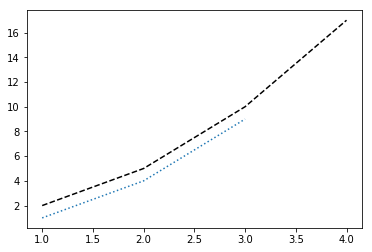

In [5]:
# Plot multiple lines in the same command with formatting
# x1, y1, fmt1, x2, y2, fmt2, ...
plt.plot([1, 2, 3], [1, 4, 9], ':', [1, 2, 3, 4], [2, 5, 10, 17], 'k--')

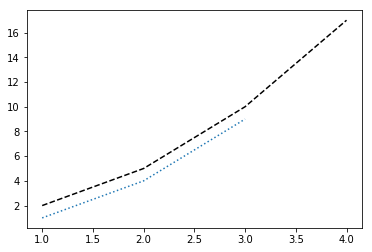

In [6]:
# It is usually preferrable to plot each line with a different command.
# Note how the two plot commands render into the same figure.
plt.plot([1, 2, 3], [1, 4, 9], ':')
plt.plot([1, 2, 3, 4], [2, 5, 10, 17], 'k--')

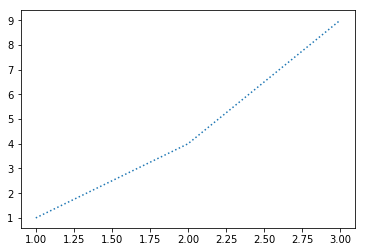

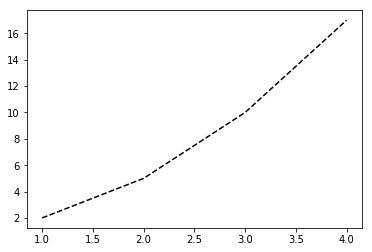

In [9]:
plt.plot([1, 2, 3], [1, 4, 9], ':')
plt.show()  # Force the plot to render. Commands that follow this will apply to a new figure
plt.plot([1, 2, 3, 4], [2, 5, 10, 17], 'k--')
plt.show()  # This last show is done automatically at the end of a Jupyter notebook cell

It would take too long to go through each individual way to modify a figure so instead we will proceed by creating a figure, breaking down how each line works, and referencing the documentation for extra information.

The pyplot module contains many plotting commands. The following are some of the most commonly used:

- plot, scatter: Line and scatter plots
- bar, barh: Bar plots (vertical and horizontal)
- contour, contourf: Contour plots (both line and filled)
- hist: Histograms with automatic binning
- quiver: 2D field of arrows
- polar: Polar plot

https://matplotlib.org/api/pyplot_summary.html

See the link above for all documentation related to pyplot.

## 1d plots

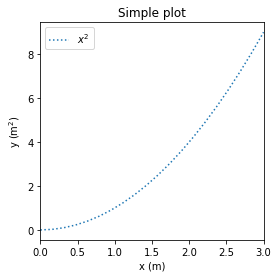

In [17]:
import numpy as np
x = np.linspace(0, 3, 20)

# Create a new figure and set its size
plt.figure(figsize=(4, 4))
plt.plot(x, x**2, ':',label=r'$x^2$')

# Note the use of the 'raw' string (starting with r). 
# This prevents backslashes from being interpreted as special characters.
plt.ylabel(r'y (m$^2$)')
plt.xlabel('x (m)')
plt.title('Simple plot')
plt.legend()
plt.xlim(0,3) #x axis starts at zero
#plt.grid()
plt.show()

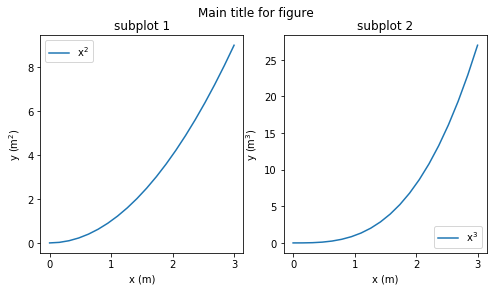

In [20]:
plt.figure(figsize=(8, 4))  # Double the width of the plot to accommodate the subplots
plt.subplot(1, 2, 1)
plt.plot(x, x**2, label=r'x$^2$')
plt.ylabel(r'y (m$^2$)')
plt.xlabel('x (m)')
plt.title('subplot 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, x**3, label=r'x$^3$')
plt.ylabel(r'y (m$^3$)')
plt.xlabel('x (m)')
plt.title('subplot 2')
plt.legend(loc=4)  # loc defines the location of the legend in the figure

# Uncomment the following line to see how to make the plots fit together better
#plt.tight_layout()
plt.suptitle('Main title for figure')
plt.show()

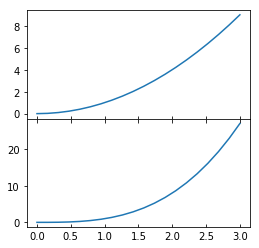

In [25]:
# Uncomment the commands in the order specified by the number to see how the plot is built

plt.figure(figsize=(4, 4))
# Subplot(211) is equivalent to subplot(2, 1, 1) due to the way matplotlib processes the parameters
ax1 = plt.subplot(211)  
plt.plot(x, x**2)
plt.tick_params(axis='x', direction='in')
ax1.set_xticklabels([])  # Note how we have to start using the object oriented api to change the plot

plt.subplot(212)
plt.plot(x, x**3)
plt.subplots_adjust(hspace=0)
plt.tick_params(axis='x', top=True, direction='in')

### Insets

Insets in Matplotlib are extremely unintuitive. They require you to specify widths, bounding boxes, and know about the transformations that are being applied to the figure to place everything on screen.

To help alleviate this, the following two helper functions allow you to place the axes in specific locations by specifying the coordinates of the subplot axes box either in data coordinates, or in axis coordinates.

In [26]:
# Helper function that adds the axes at a particular location in data space
def add_inset_in_data_coords(ax, xmin, xmax, ymin, ymax):
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    inset_axes(ax, width="100%", height="100%",
              bbox_to_anchor=(xmin, ymin, xmax-xmin, ymax-ymin),
              bbox_transform=ax.transData, loc=10, borderpad=0)
    
# Helper function that adds the axes at a particular location in axis space
def add_inset_in_axis_coords(ax, xmin, xmax, ymin, ymax):
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    inset_axes(ax, width="100%", height="100%",
              bbox_to_anchor=(xmin, ymin, xmax-xmin, ymax-ymin),
              bbox_transform=ax.transAxes, loc=10, borderpad=0)

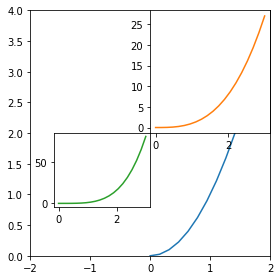

In [28]:
# Uncomment the commands in the order specified by the number to see how the plot is built
#from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig = plt.figure(figsize=(4, 4))

plt.plot(x, x**2)
plt.xlim(-2, 2)
plt.ylim(0, 4)

# Get the axes that you want to insert into
ax = plt.gca()

# Change these values to get the plots to fit where you want them
add_inset_in_data_coords(ax, 0, 2, 2, 4)
plt.plot(x, x**3, 'C1')

# Change these values to get the plots to fit where you want them
add_inset_in_axis_coords(ax, 0.1, 0.5, 0.2, 0.5)
plt.plot(x, x**4, 'C2')

plt.tight_layout()

### Other types of 1d plots

(0, 193.44501903066438)

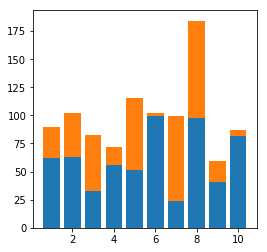

In [30]:
plt.figure(figsize=(4, 4))
N = 10
x = np.arange(N)+1
vals1 = np.random.random(N)*100
vals2 = np.random.random(N)*100
plt.bar(x, vals1)
# Place the bottom of the second bar at the top of the first bar to stack them
plt.bar(x, vals2, bottom=vals1)
plt.ylim(ymin=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


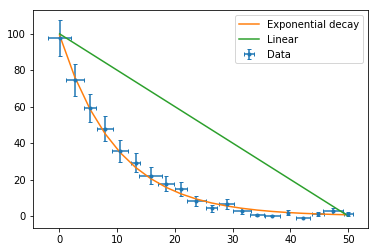

In [38]:
x = np.linspace(0.1, 50, 20)
y = 100*np.exp(-x/10) + 3*(2*np.random.random(x.shape[0]) - 1.0)

plt.errorbar(x, y, yerr=np.sqrt(y), label='Data', xerr = 2*np.random.random(x.shape[0]), capsize=2, fmt='.')
# Try adding the following parameters
# capsize=3
# fmt='.'
# xerr = 1
# xerr = 2*np.random.random(x.shape[0])

plt.plot(x, 100*np.exp(-x/10), label='Exponential decay')
plt.plot(x, 100 - 2*x, label='Linear')
plt.legend()

In order to work with 2d plots we need to understand the data structure that matplotlib expects to see.

For every point in the plot there needs to be three values specified `(x, y, z)`. 

The way matplotlib expects you to pass this information is as a 2d array of x points, a 2d array of y points, and a 2d array of z points.

In [31]:
import matplotlib
matplotlib.rcParams

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [41]:
# Use np.meshgrid to create the X and Y 2d arrays
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)

print('X array:')
print(X)
print('\nY array:')
print(Y)

X array:
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]

Y array:
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


In [42]:
Z = np.sin(X) + np.cos(Y)
print('X array:')
print(X)
print('\nY array:')
print(Y)
print('\nZ array:')
print(Z)

X array:
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]

Y array:
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]

Z array:
[[-1.32544426 -1.25761782 -0.41614684  0.42532415  0.49315059]
 [-0.36899512 -0.30116868  0.54030231  1.38177329  1.44959973]
 [ 0.09070257  0.15852902  1.          1.84147098  1.90929743]
 [-0.36899512 -0.30116868  0.54030231  1.38177329  1.44959973]
 [-1.32544426 -1.25761782 -0.41614684  0.42532415  0.49315059]]


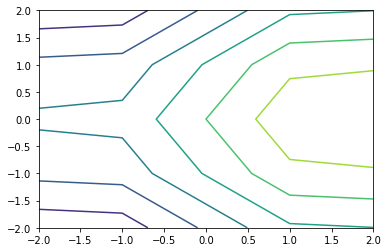

In [43]:
plt.contour(X, Y, Z)

In [48]:
# Create more finely spaced data
x = np.linspace(-2, 2, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

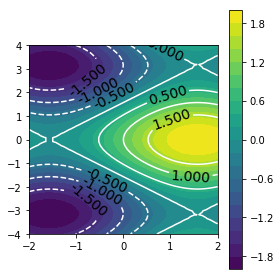

In [49]:
plt.figure(figsize=(4, 4))
# Store the contours in a variable so that clabel can use them
contours = plt.contour(X, Y, Z, colors='w')
plt.clabel(contours, fontsize=14, colors='k')
plt.contourf(X, Y, Z, 20)
plt.colorbar()

# Force the plot to have an aspect ratio of 1
# Uncomment these lines to see the difference
ax = plt.gca()  # Get the current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
aspect = (xlim[1] - xlim[0])/(ylim[1] - ylim[0])
ax.set_aspect(aspect)

plt.tight_layout()

### Colour map choice

Some commonly used colour maps have serious issues with adding extra visual information that is not contained in the data. Probably the most common offender is the jet, or rainbow, color map.

When plotting lines on a chart, this is not a problem, because the colour is meant to represent different data, but when creating a 2d plot, colour represents the value of the data, and sharp transitions in colour are interpreted as features.

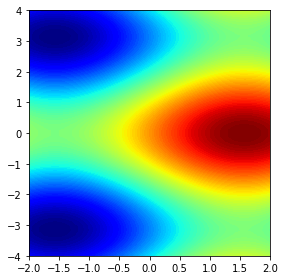

In [50]:
plt.figure(figsize=(4, 4))
plt.contourf(X, Y, Z, 100, cmap='jet')
plt.tight_layout()
plt.savefig('test_jet.png')  # The file extension determines how the figure is saved

This is particularly visible if we convert the image to greyscale.

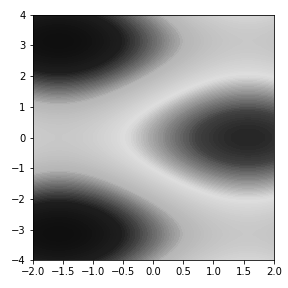

In [51]:
# Don't worry about the details of how the PIL package works. 
# We are just using this to demonstrate the issues with colour maps.
from PIL import Image
Image.open('test_jet.png').convert('LA')

The default colour map in Matplotlib (called viridis) was specifically designed to address this issue.

See these links for more details:
- https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
- https://matplotlib.org/examples/color/colormaps_reference.html
- https://bids.github.io/colormap/

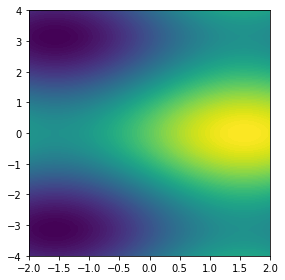

In [52]:
plt.figure(figsize=(4, 4))
plt.contourf(X, Y, Z, 100)
plt.tight_layout()
plt.savefig('test.png')  # The file extension determines how the figure is saved

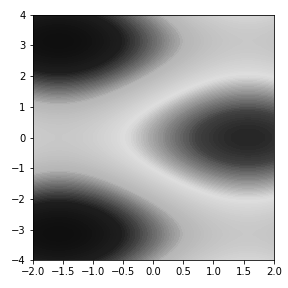

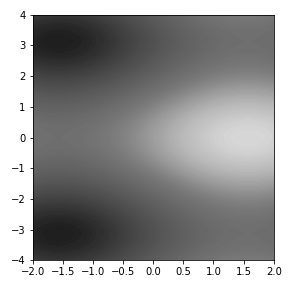

In [53]:
from PIL import Image
# Comparing jet to a perceptually uniform colour map
display(Image.open('test_jet.png').convert('LA'), Image.open('test.png').convert('LA'))

### Using an image instead of contour plots

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html

An image is made up of pixels, which have integer indexes between 0 and the size of the image. In order to plot the image in plot space you need to specify the image `extent` as well as the maximum and minimum values of the data with `vmax` and `vmin`.

Interpolation describes how the pixels are rendered. If `interpolation='nearest'` then there is no interpolation and the image will look pixelated. `interpolation='bicubic'` typically gives the best looking results.

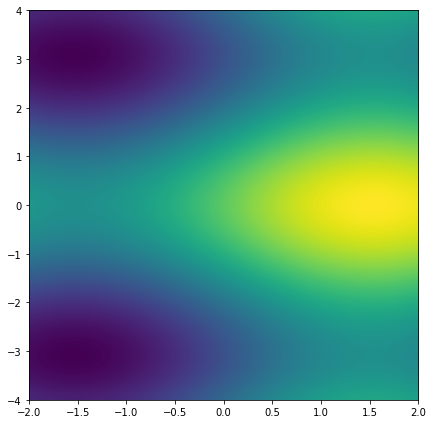

In [56]:
plt.figure(figsize=(6, 6))
# Replace contourf with imshow to get smoother plots
#plt.contourf(X, Y, Z, 20)
plt.imshow(Z, cmap='viridis', interpolation='bicubic',
               origin='lower', extent=[min(x), max(x), min(y), max(y)],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

ax = plt.gca()  # Get the current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
aspect = (xlim[1] - xlim[0])/(ylim[1] - ylim[0])
ax.set_aspect(aspect)
plt.tight_layout()

## Other examples

Full list of examples can be found here: https://matplotlib.org/gallery/index.html

Some neat examples showcasing the possibilities:
- https://matplotlib.org/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py
- https://matplotlib.org/gallery/text_labels_and_annotations/annotation_demo.html#more-examples-of-coordinate-systems
- https://matplotlib.org/gallery/images_contours_and_fields/tricontour_smooth_delaunay.html#sphx-glr-gallery-images-contours-and-fields-tricontour-smooth-delaunay-py
- https://matplotlib.org/gallery/text_labels_and_annotations/font_table.html#sphx-glr-gallery-text-labels-and-annotations-font-table-py
- https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
- https://matplotlib.org/gallery/specialty_plots/sankey_links.html#sphx-glr-gallery-specialty-plots-sankey-links-py